# VOTER PREDICTION

## LOADING THE DATASET

In [1]:
#Loading the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
#Reading the dataset
df = pd.read_csv('primary_results.csv')

In [3]:
df

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
...,...,...,...,...,...,...,...,...
24606,Wyoming,WY,Teton-Sublette,95600028.0,Republican,Ted Cruz,0,0.000
24607,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Donald Trump,0,0.000
24608,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,John Kasich,0,0.000
24609,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Marco Rubio,0,0.000


In [4]:
df.head(50)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
5,Alabama,AL,Barbour,1005.0,Democrat,Hillary Clinton,2567,0.906
6,Alabama,AL,Bibb,1007.0,Democrat,Bernie Sanders,246,0.197
7,Alabama,AL,Bibb,1007.0,Democrat,Hillary Clinton,942,0.755
8,Alabama,AL,Blount,1009.0,Democrat,Bernie Sanders,395,0.386
9,Alabama,AL,Blount,1009.0,Democrat,Hillary Clinton,564,0.551


In [32]:
df
df.reset_index(inplace=True)
df

,level_0,index,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,0,0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,1,1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,2,2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,3,3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,4,4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
...,...,...,...,...,...,...,...,...,...,...
24606,24606,24606,Wyoming,WY,Teton-Sublette,95600028.0,Republican,Ted Cruz,0,0.000
24607,24607,24607,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Donald Trump,0,0.000
24608,24608,24608,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,John Kasich,0,0.000
24609,24609,24609,Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Marco Rubio,0,0.000


In [44]:
#df.drop_duplicates(subset='state',keep='first',inplace=True)
df.set_index('state')

,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
state,,,,,,,
Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078
...,...,...,...,...,...,...,...
Wyoming,WY,Teton-Sublette,95600028.0,Republican,Ted Cruz,0,0.000
Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,Donald Trump,0,0.000
Wyoming,WY,Uinta-Lincoln,95600027.0,Republican,John Kasich,0,0.000


In [45]:
df.shape

(24611, 8)

## EXPLORATORY DATA ANALYSIS(EDA)

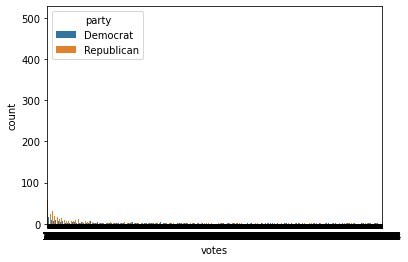

In [46]:
sns.countplot('votes',hue='party',data=df)